In [2]:
import datetime
import pandas_datareader as pdr
import pandas as pd

api_key='71be671ca49c87ed644956fdd46f8a398b51f899'


tickers = ['COKE', 'DGEAF', 'TSLA', 'LVMUY']


start="2020-1-1"
end="2021-7-1"


df = pdr.tiingo.TiingoDailyReader(tickers, start=start, end=end, api_key=api_key)

all_data = df.read()
all_data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close      high     low     open  volume  \
symbol date                                                                   
COKE   2020-01-02 00:00:00+00:00  282.40  286.2900  277.33  285.740   42254   
       2020-01-03 00:00:00+00:00  285.76  287.3600  277.48  279.770   37502   
       2020-01-06 00:00:00+00:00  282.01  286.5000  281.64  284.050   29318   
       2020-01-07 00:00:00+00:00  279.16  282.5600  275.38  281.320   42444   
       2020-01-08 00:00:00+00:00  277.26  281.7000  275.76  278.560   24821   
...                                  ...       ...     ...      ...     ...   
LVMUY  2021-06-25 00:00:00+00:00  161.54  161.5400  160.31  160.741   73046   
       2021-06-28 00:00:00+00:00  159.64  159.9600  158.95  159.930  125574   
       2021-06-29 00:00:00+00:00  161.04  161.0400  160.11  160.990   81388   
       2021-06-30 00:00:00+00:00  157.80  159.0900  156.73  158.320  147363   
       2021-07-01 00:00:00+00:00  156.96  157.8199  156.33  157.610  129210   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
COKE   2020-01-02 00:00:00+00:00  280.126508  283.985191  275.097324   
       2020-01-03 00:00:00+00:00  283.459458  285.046577  275.246117   
       2020-01-06 00:00:00+00:00  279.739648  284.193500  279.372626   
       2020-01-07 00:00:00+00:00  276.912592  280.285220  273.163023   
       2020-01-08 00:00:00+00:00  275.027888  279.432143  273.539964   
...                                      ...         ...         ...   
LVMUY  2021-06-25 00:00:00+00:00  159.015918  159.015918  157.805137   
       2021-06-28 00:00:00+00:00  157.145606  157.460606  156.466387   
       2021-06-29 00:00:00+00:00  158.523731  158.523731  157.608262   
       2021-06-30 00:00:00+00:00  155.334356  156.604200  154.281075   
       2021-07-01 00:00:00+00:00  154.507481  155.353945  153.887325   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
COKE   2020-01-02 00:00:00+00:00  283.439619      42254      0.0          1.0  
       2020-01-03 00:00:00+00:00  277.517681      37502      0.0          1.0  
       2020-01-06 00:00:00+00:00  281.763224      29318      0.0          1.0  
       2020-01-07 00:00:00+00:00  279.055203      42444      0.0          1.0  
       2020-01-08 00:00:00+00:00  276.317422      24821      0.0          1.0  
...                                      ...        ...      ...          ...  
LVMUY  2021-06-25 00:00:00+00:00  158.229403      73046      0.0          1.0  
       2021-06-28 00:00:00+00:00  157.431075     125574      0.0          1.0  
       2021-06-29 00:00:00+00:00  158.474512      81388      0.0          1.0  
       2021-06-30 00:00:00+00:00  155.846231     147363      0.0          1.0  
       2021-07-01 00:00:00+00:00  155.147325     129210      0.0          1.0  

[1512 rows x 12 columns]

In [4]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['adjClose']].reset_index().pivot('date', 'symbol', 'adjClose')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()
daily_pct_change

symbol,COKE,DGEAF,LVMUY,TSLA
date,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,0.011898,-0.009641,-0.008910,0.029633
2020-01-06 00:00:00+00:00,-0.013123,0.008518,-0.000214,0.019255
2020-01-07 00:00:00+00:00,-0.010106,-0.004102,-0.009420,0.038801
2020-01-08 00:00:00+00:00,-0.006806,0.007996,0.008213,0.049205
...,...,...,...,...
2021-06-25 00:00:00+00:00,0.006829,0.010531,0.004165,-0.011694
2021-06-28 00:00:00+00:00,-0.008485,-0.027789,-0.011762,0.025079
2021-06-29 00:00:00+00:00,-0.008980,0.000000,0.008770,-0.011558


In [6]:
# Save results to csv
daily_pct_change.to_csv('stock_price_pct_change.csv', index=True)

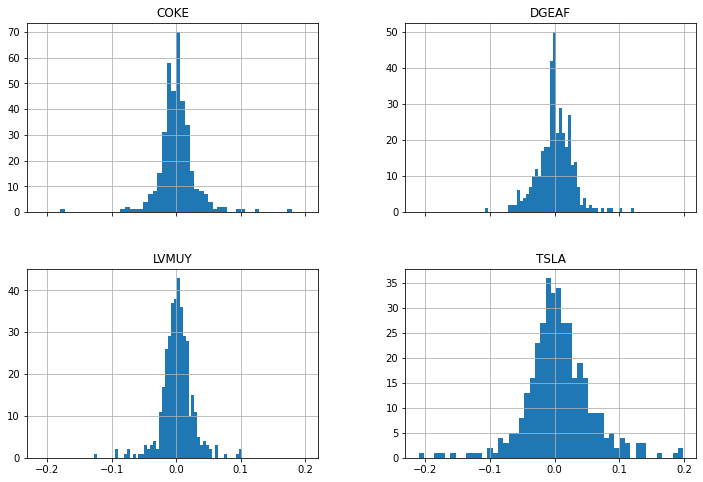

In [7]:
# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()